In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

os.chdir('../Dataset/Annotated')

In [2]:
gse41848 = pd.read_csv('GSE41848_filtered.csv', index_col=0)
gse19301 = pd.read_csv("GSE19301_filtered.csv", index_col=0)
gse59867 = pd.read_csv("GSE59867_filtered.csv", index_col=0)
gse61240 = pd.read_csv("GSE61240_filtered.csv", index_col=0)
gse136411 = pd.read_csv("GSE136411_filtered.csv", index_col=0)
gse146383 = pd.read_csv("GSE146383_filtered.csv", index_col=0)
gse88794 = pd.read_csv("GSE88794_filtered.csv", index_col=0)

In [12]:
genes41848 = gse41848.columns.values[1:]
genes19301 = gse19301.columns.values[1:]
genes59867 = gse59867.columns.values[1:]
genes61240 = gse61240.columns.values[1:]
genes136411 = gse136411.columns.values[1:]
genes146383 = gse146383.columns.values[1:]
genes88794 = gse88794.columns.values[1:]

def corrispondenze(*arrays):
    corrispondenzeMultiple = set()
    corrispondenzeEsatte = set()
    conteggio = {}
    
    for array in arrays:
        for stringa in set(array):
            conteggio[stringa] = conteggio.get(stringa, 0) + 1
    
    for stringa, conteggio in conteggio.items():
        if conteggio >= 6:
            corrispondenzeMultiple.add(stringa)
        if conteggio == 7:
            corrispondenzeEsatte.add(stringa)
    
    return list(corrispondenzeEsatte), list(corrispondenzeMultiple)

corrispondenzeEsatte, corrispondenzeMultiple = corrispondenze(genes41848, genes19301, genes59867, genes61240, genes136411, genes146383, genes88794)

print(len(corrispondenzeEsatte), len(corrispondenzeMultiple))
print("Geni in comune a GSE41848:", len(set(corrispondenzeMultiple) & set(genes41848)))
print("Geni in comune a GSE19301:", len(set(corrispondenzeMultiple) & set(genes19301)))
print("Geni in comune a GSE59867:", len(set(corrispondenzeMultiple) & set(genes59867)))
print("Geni in comune a GSE61240:", len(set(corrispondenzeMultiple) & set(genes61240)))
print("Geni in comune a GSE136411:", len(set(corrispondenzeMultiple) & set(genes136411)))
print("Geni in comune a GSE146383:", len(set(corrispondenzeMultiple) & set(genes146383)))
print("Geni in comune a GSE88794:", len(set(corrispondenzeMultiple) & set(genes88794)))

5585 12091
Geni in comune a GSE41848: 11891
Geni in comune a GSE19301: 12091
Geni in comune a GSE59867: 12091
Geni in comune a GSE61240: 12091
Geni in comune a GSE136411: 5785
Geni in comune a GSE146383: 12091
Geni in comune a GSE88794: 12091


In [4]:
def add(dataset, columns):
    for column in columns:
        if column not in dataset.columns.values:
            print("aggiungo")
            dataset[column] = 0
    return dataset


def merge(*datasets, genes):
    merged = pd.DataFrame()
    columns = ['SampleID']+genes
    length = 0
    for dataset in datasets:
        if ~ np.all(np.isin(dataset.columns.values, columns)): dataset=add(dataset, columns)
        filtered = dataset[columns]
        if merged.empty:
            merged = filtered
        else:
            merged = pd.concat([merged, filtered], ignore_index=True)
    
    return merged

mergedDataset = merge(gse41848, gse19301, gse59867, gse61240, gse146383, gse88794, genes=corrispondenzeEsatte)

def rename(entry, sampleSeries):
    for i in range(0, len(sampleSeries)):
        if entry in sampleSeries[i].values:
            return str(i)+'-'+entry

mergedDataset['SampleID'] = mergedDataset['SampleID'].apply(lambda x: rename(x, [gse41848['SampleID'], gse19301['SampleID'], gse59867['SampleID'], gse61240['SampleID'], gse146383['SampleID'], gse88794['SampleID']]))

def etichetta(entry):
    return 0 if 'Control' in entry else 1

label = pd.DataFrame()
label['SampleID'] = mergedDataset['SampleID']
label['Label'] = mergedDataset['SampleID'].apply(lambda x: etichetta(x))

mergedDataset = label.merge(mergedDataset, on='SampleID', how='inner')

print(mergedDataset.shape)
print("I pazienti malati sono:", mergedDataset['Label'].sum())
print("I pazienti sani sono:", mergedDataset.shape[0] - mergedDataset['Label'].sum())
mergedDataset.head()

(1804, 11893)
I pazienti malati sono: 698
I pazienti sani sono: 1106


,SampleID,Label,SEMA6A,BPNT1,TENT5A,COQ3,ZNF611,NANS,VAT1,LRRC1,...,ARF5,GRIK2,CHST12,GOSR2,NEUROD4,CAND1,PRDM10,TPGS2,GML,ADAM11
0,0-GSM1026056_600009.0001,1,4.764239,7.291200,8.194042,4.416651,5.896154,6.675369,7.972096,5.360764,...,8.830948,3.616120,9.016145,8.555337,4.515435,8.429495,7.299066,9.629905,5.135978,6.797542
1,0-GSM1026057_600009.0001-FollowUp_1,1,4.307056,7.140532,8.272426,4.200021,6.204898,7.031668,8.002098,5.285154,...,8.706475,3.568381,9.059514,8.322976,4.638842,8.526939,7.375195,9.043438,5.051140,6.820661
2,0-GSM1026058_41461.0001,1,5.145559,6.876060,8.339003,4.428160,5.781309,7.211629,7.940906,5.293984,...,9.055505,3.807382,8.774589,8.316534,4.994948,7.979165,7.264920,9.193383,5.087156,7.042195
3,0-GSM1026059_41462.0001,1,4.667438,7.236413,8.339460,4.449403,6.828280,7.674889,7.895444,5.040917,...,9.170577,3.701587,8.728360,8.637659,4.087814,8.298562,7.403264,9.234780,5.301602,6.687528
4,0-GSM1026060_600029.0001,1,4.565348,6.922794,9.165469,4.066200,6.513582,7.421996,7.859709,5.277879,...,8.585396,3.598350,8.805307,8.207769,4.573257,8.552524,7.436634,9.560546,4.903233,6.641227


In [10]:
statistiche = mergedDataset[mergedDataset.columns.values[2:]].describe()
print(statistiche)

# Calcolo la media delle medie delle serie
media_medie = statistiche.loc['mean'].mean()

# Calcolo la deviazione standard delle medie delle serie
deviazione_standard_medie = statistiche.loc['std'].mean()

print("Media delle medie delle serie:", media_medie)
print("Deviazione standard media:", deviazione_standard_medie)

             PDIA2         EMP2         VWA7       ZNF549         PLK3  \
count  2113.000000  2113.000000  2113.000000  2113.000000  2113.000000   
mean      4.075933     4.080432     4.764853     5.455797     7.268464   
std       1.963431     1.906848     2.137997     1.325943     0.688029   
min       0.000000     0.000000     0.000000     2.596780     5.055271   
25%       3.148613     3.378391     4.258605     4.424458     6.697895   
50%       5.065610     5.003761     5.782352     5.590923     7.366643   
75%       5.482912     5.488710     6.127206     6.688490     7.801417   
max       6.650671     7.465007     7.337406     8.095978     9.523568   

             RAB14      PDCD6IP        APMAP         GLG1        SHTN1  ...  \
count  2113.000000  2113.000000  2113.000000  2113.000000  2113.000000  ...   
mean      8.932349     9.897187     8.299642     9.809748     6.706853  ...   
std       1.576629     1.045736     3.877474     1.412803     3.074571  ...   
min       4.71369

In [ ]:
os.chdir('../Merged')
mergedDataset = pd.read_csv("MergedDataset.csv", index_col=0)
mergedDataset.drop(columns=['SampleID'], inplace=True)

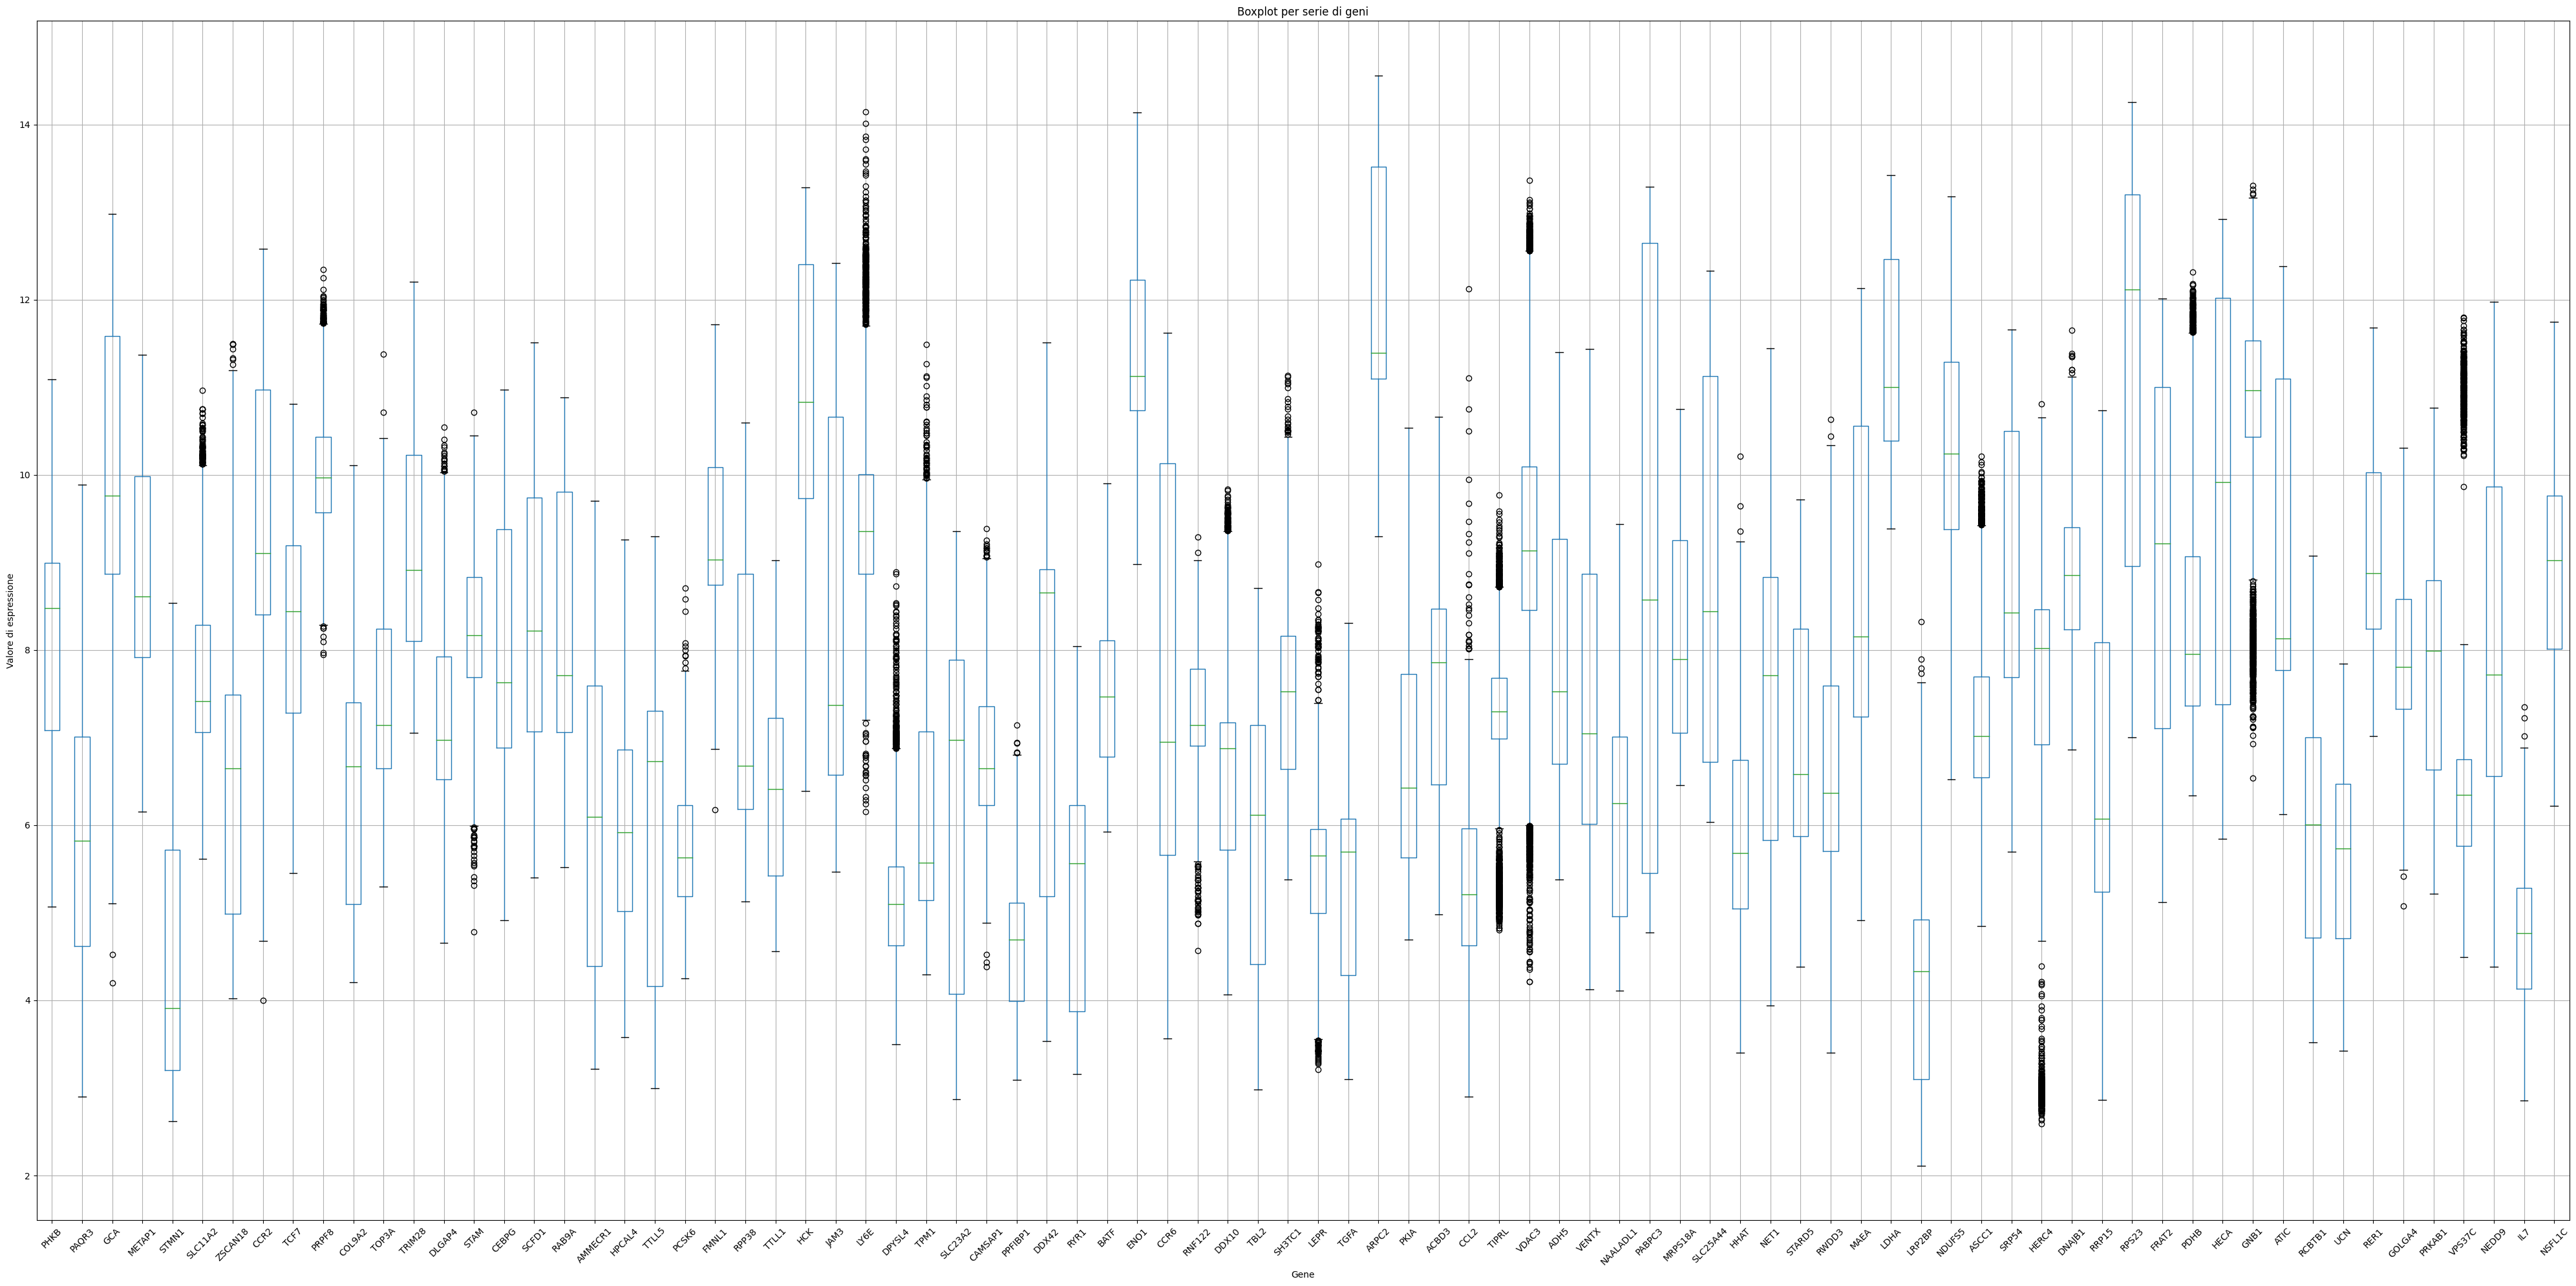

In [32]:
plt.figure(figsize=(40, 20))

partialDataset = mergedDataset.sample(frac = 0.015, axis=1)

partialDataset.boxplot()

plt.title('Boxplot per serie di geni')
plt.xticks(rotation=45)
plt.xlabel('Gene')
plt.ylabel('Valore di espressione')
plt.grid(True)

plt.tight_layout()
plt.show()

Visualizzo la distribuzione di alcuni geni scelti a caso dal campione, l'ampiezza dell'intervallo segue la regola di  Freedman-Diaconis, che tiene conto della deviazione standard e della dimensione del campione.

ampiezza = 2 * ( (devSTD) / (numeroSample^1/3) ) 

(array([ 10.,  30.,  48.,  68.,  93.,  99.,  89.,  85., 102., 149., 164.,
        178., 167., 158., 137., 105.,  61.,  50.,  26.,  31.,  21.,  19.,
         23.,  30.,  30.,  41.,  41.,  25.,  18.,   7.,   5.,   3.]),
 array([3.76689305, 3.92593956, 4.08498608, 4.2440326 , 4.40307912,
        4.56212564, 4.72117216, 4.88021868, 5.03926519, 5.19831171,
        5.35735823, 5.51640475, 5.67545127, 5.83449779, 5.99354431,
        6.15259083, 6.31163734, 6.47068386, 6.62973038, 6.7887769 ,
        6.94782342, 7.10686994, 7.26591646, 7.42496297, 7.58400949,
        7.74305601, 7.90210253, 8.06114905, 8.22019557, 8.37924209,
        8.5382886 , 8.69733512, 8.85638164]),
 <BarContainer object of 32 artists>)

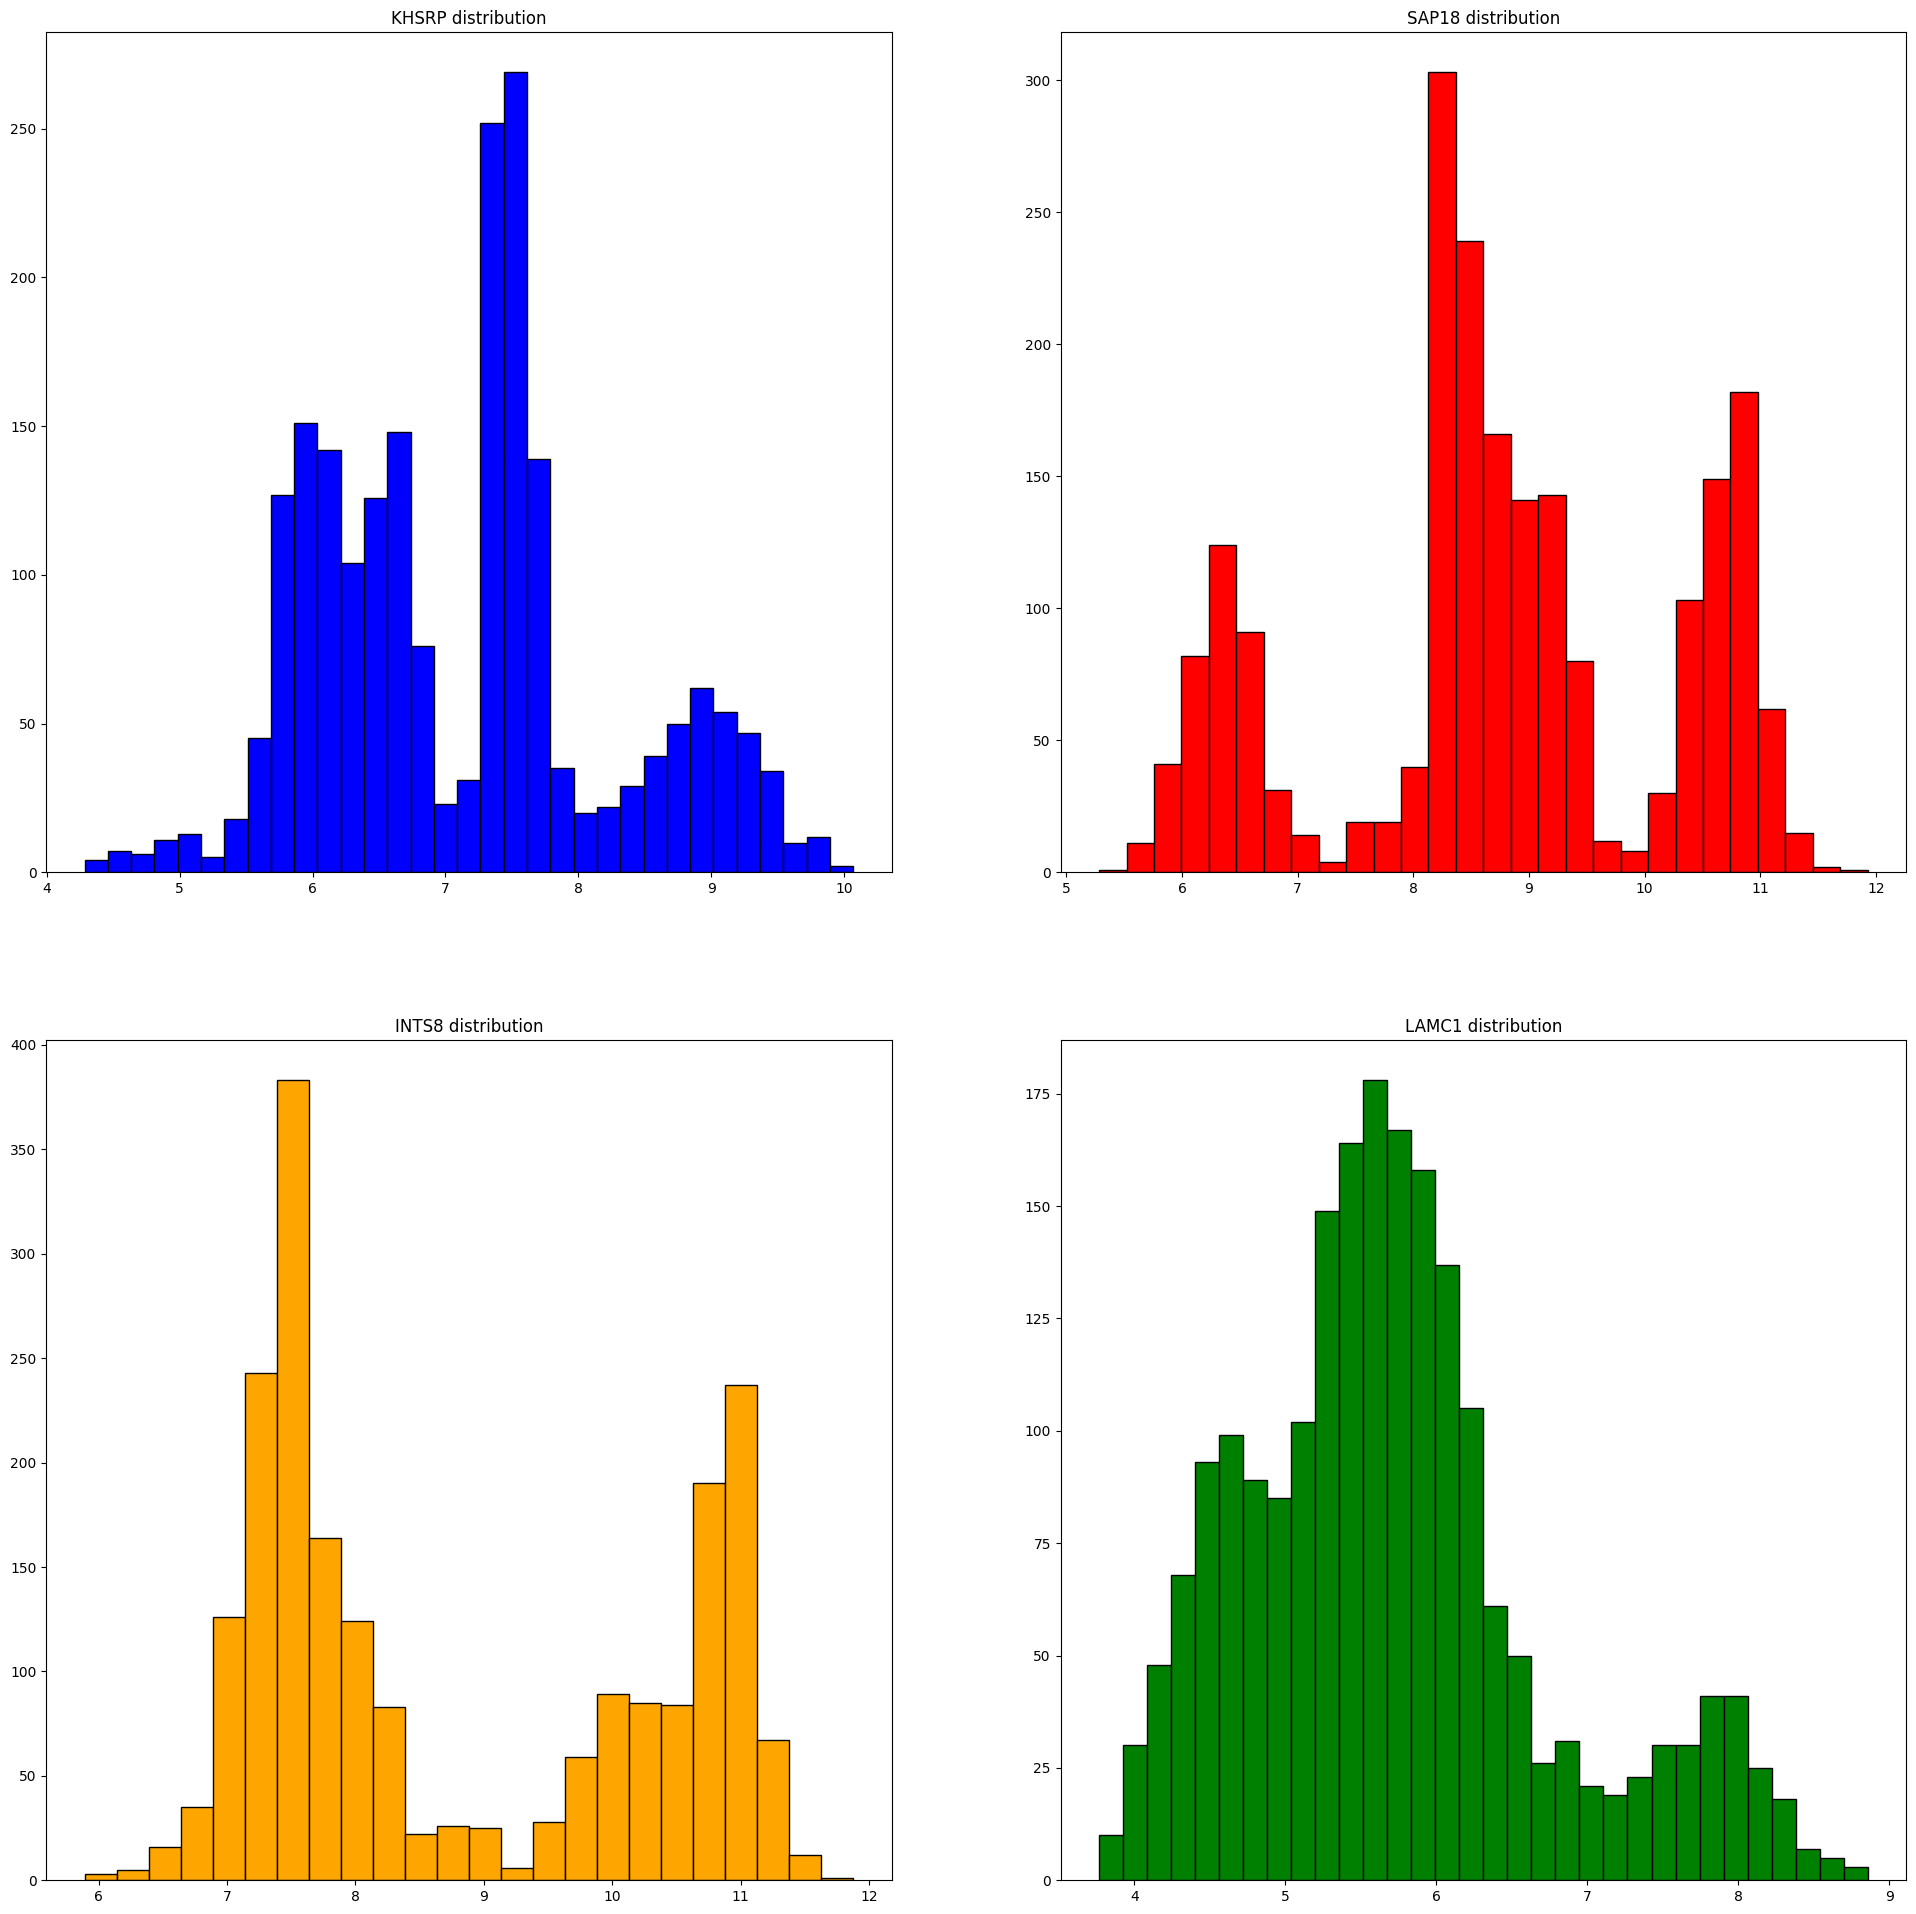

In [8]:
fig = plt.figure(figsize=(24, 24))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_title('KHSRP distribution')
amp1 = 2*(statistiche['KHSRP'].loc['std']/pow(2113, (1/3)))
bin1 = int((statistiche['KHSRP'].loc['max']-statistiche['KHSRP'].loc['min'])/amp1)
ax1.hist(mergedDataset['KHSRP'], bins = bin1, color='blue', edgecolor='black')

ax2.set_title('SAP18 distribution')
amp2 = 2*(statistiche['SAP18'].loc['std']/pow(2113, (1/3)))
bin2 = int((statistiche['SAP18'].loc['max']-statistiche['SAP18'].loc['min'])/amp2)
ax2.hist(mergedDataset['SAP18'], bins = bin2, color='red', edgecolor='black')

ax3.set_title('INTS8 distribution')
amp3 = 2*(statistiche['INTS8'].loc['std']/pow(2113, (1/3)))
bin3 = int((statistiche['INTS8'].loc['max']-statistiche['INTS8'].loc['min'])/amp3)
ax3.hist(mergedDataset['INTS8'], bins = bin3, color='orange', edgecolor='black')

ax4.set_title('LAMC1 distribution')
amp4 = 2*(statistiche['LAMC1'].loc['std']/pow(2113, (1/3)))
bin4 = int((statistiche['LAMC1'].loc['max']-statistiche['LAMC1'].loc['min'])/amp4)
ax4.hist(mergedDataset['LAMC1'], bins = bin4, color='green', edgecolor='black')